Logistics Regression analyzes a data-set which has a dependent variable and one or more independent variables to predict the Outcome in a binary variable, meaning it will have only two outcomes, 1 or 0. 
The dependent variable is categorical in nature.
The distribution of data in logistics regression is sigmoidal. A sigmoid distribution is a statistical function that has an “S” shaped curve. It is also known as a sigmoid curve or a logistic function.
The formula for a sigmoid curve is σ(x) = 1 / (1+e^(-x)). The curve has a value from 0 - 1 but only approaches those limits but does not reach either limit.
In this example the curve will be used as a probablility distribution to determine the likelihood of an Outcome.

In [5]:
# %matplotlib inline  is a magic command to allow you to display plots in the notebook. Jupyter feature
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
df = pd.read_csv(r"C:\Users\alexd\Logistics_Regression\pima_diabetes_data_ready.csv")
df.head()

,pregnancies,glucose,b_p,skin_fold,insulin,bmi,age,outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [7]:
df.shape

(768, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   b_p          768 non-null    int64  
 3   skin_fold    768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   age          768 non-null    int64  
 7   outcome      768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


In [9]:
df.describe()

,pregnancies,glucose,b_p,skin_fold,insulin,bmi,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,81.000000,1.000000


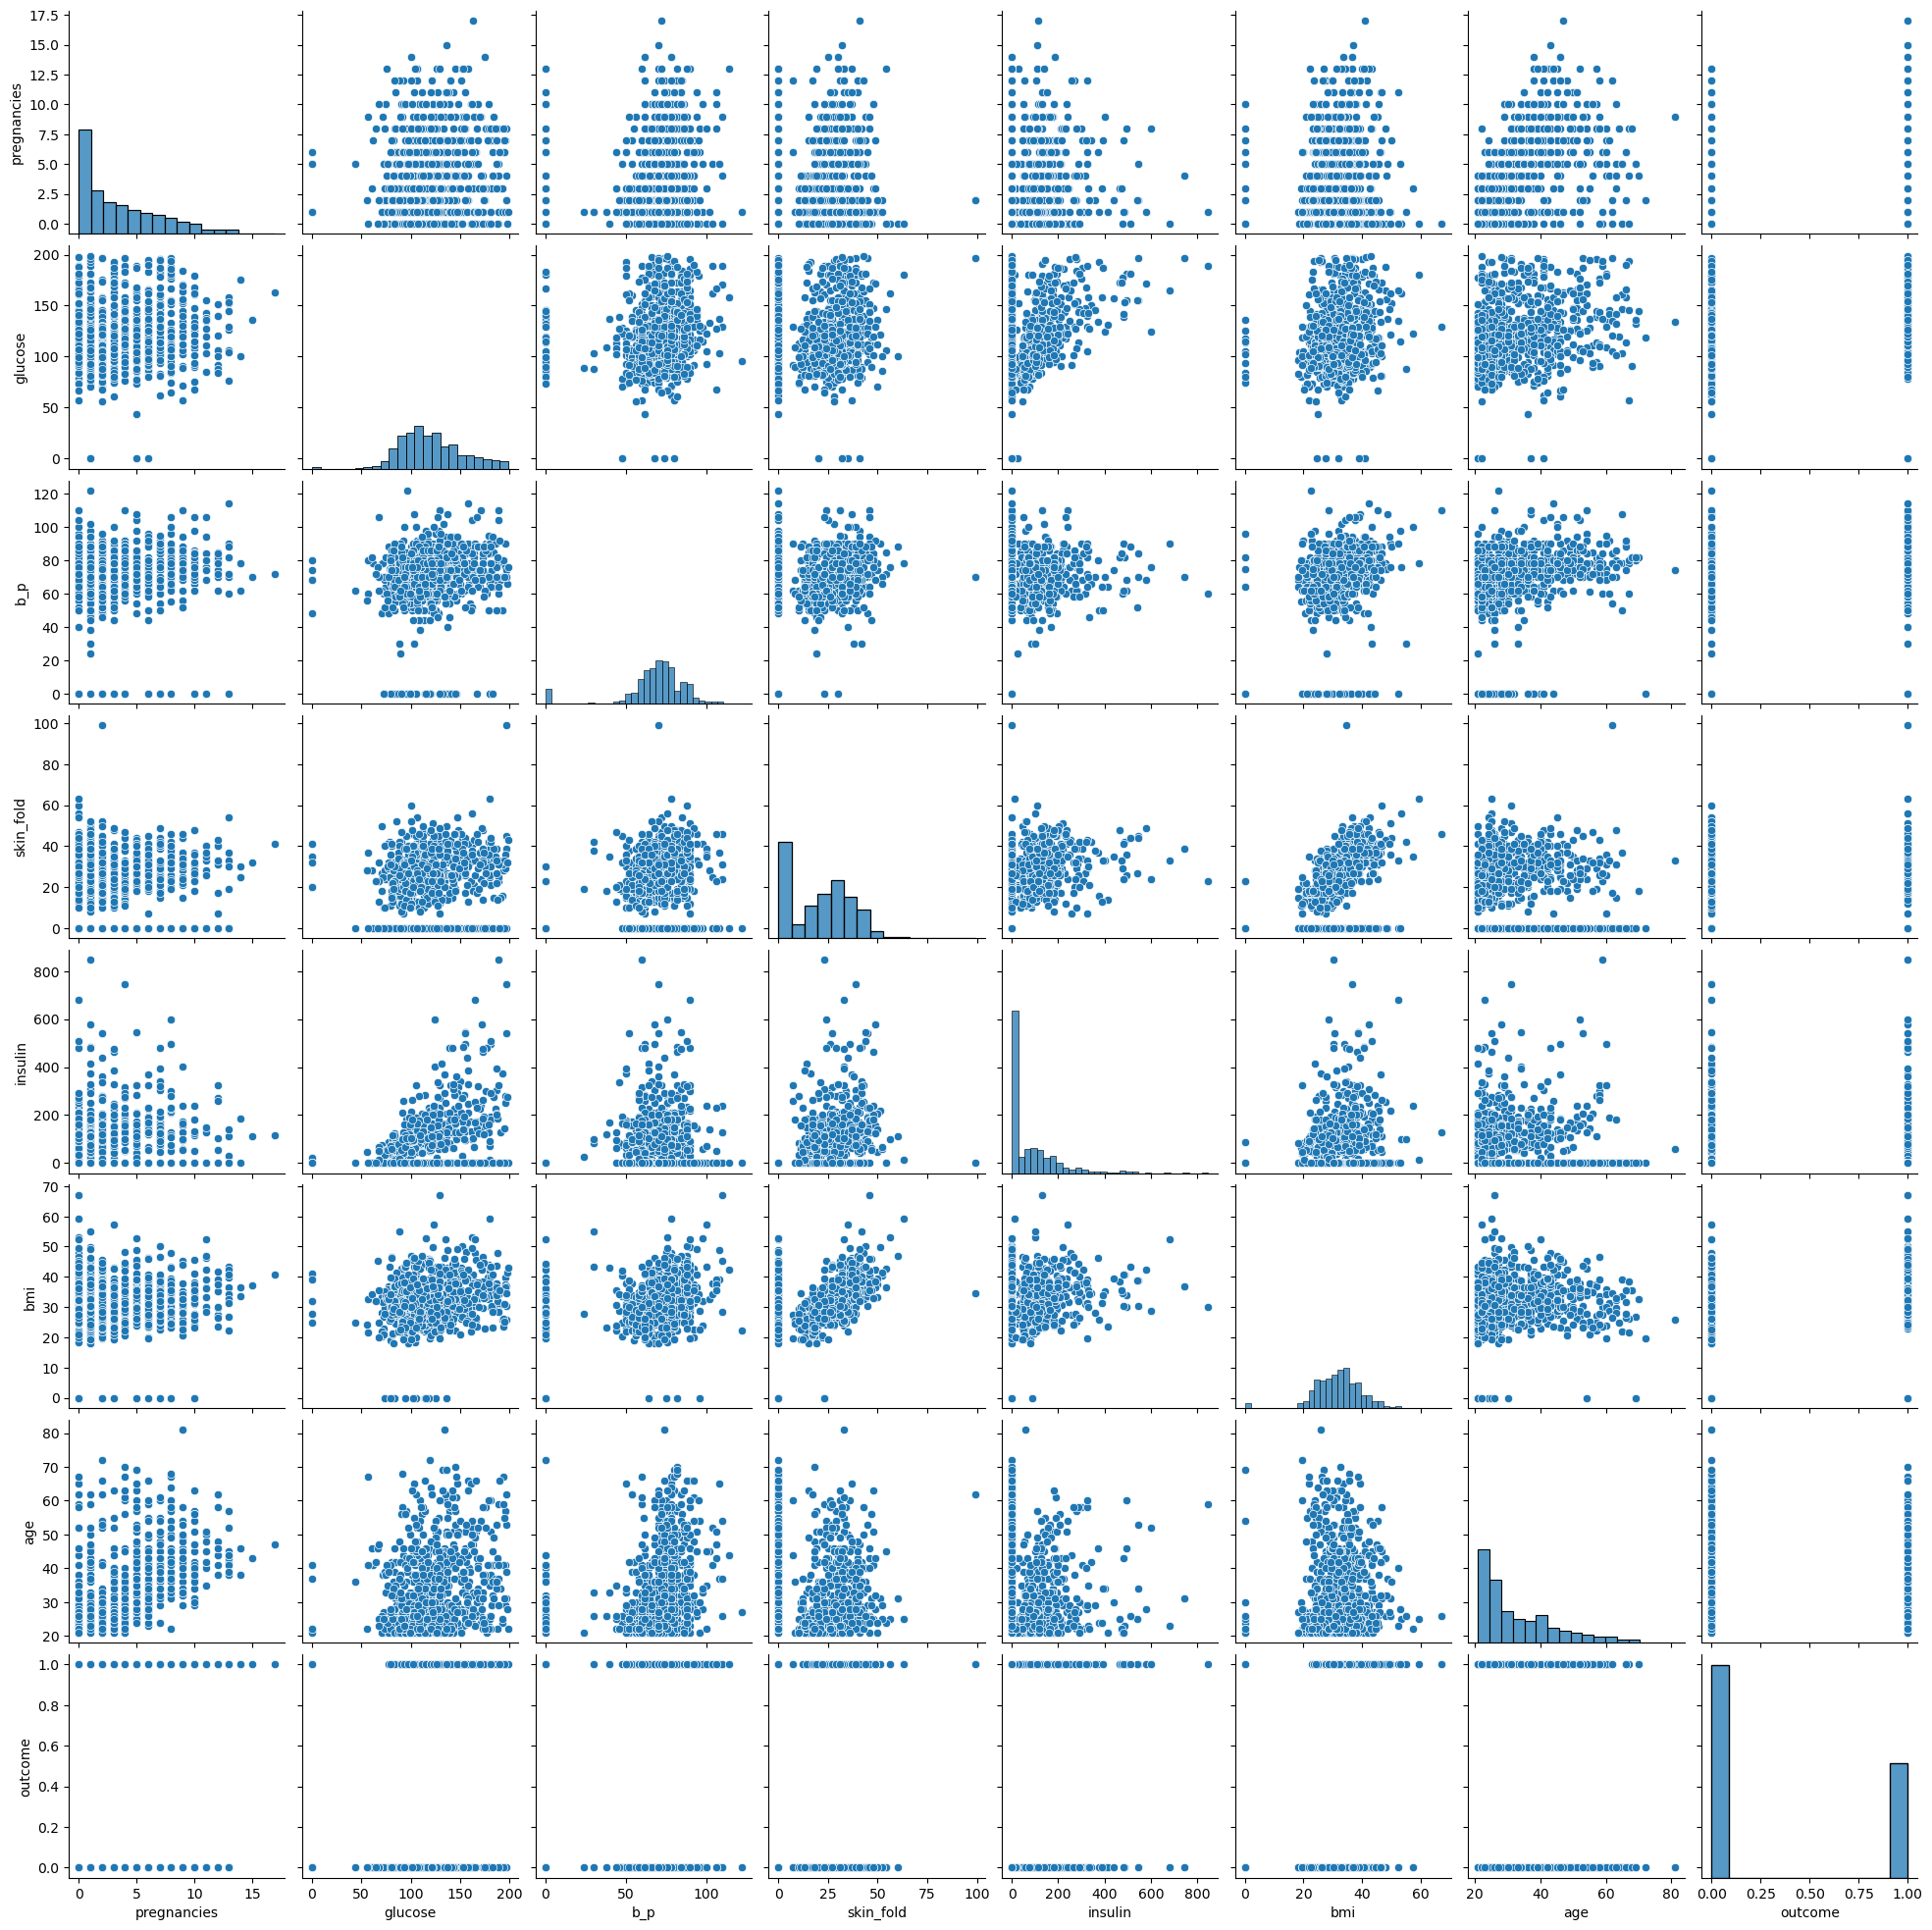

In [10]:
sns.pairplot(df)

In [11]:
df.isnull().sum()

pregnancies    0
glucose        0
b_p            0
skin_fold      0
insulin        0
bmi            0
age            0
outcome        0
dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='age'>

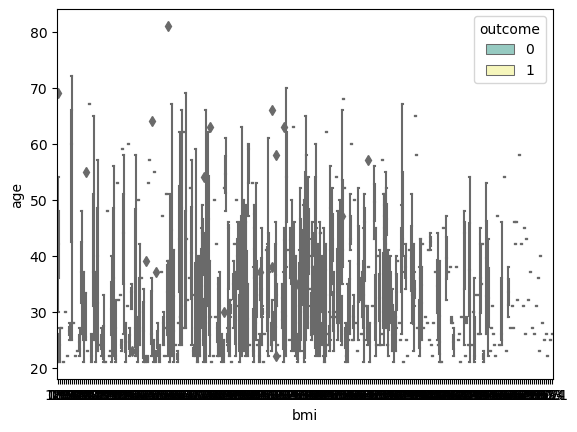

In [12]:
sns.boxplot(x="bmi", y="age", hue = "outcome", data=df, palette='Set3') # this is not effective for this example

Use the .iloc method to split off the first 6 columns to X and the last column to y

In [13]:
X=df.iloc[:, :6].values
y=df.iloc[:, -1].values
print(X)

[[  6.  148.   72.   35.    0.   33.6]
 [  1.   85.   66.   29.    0.   26.6]
 [  8.  183.   64.    0.    0.   23.3]
 ...
 [  5.  121.   72.   23.  112.   26.2]
 [  1.  126.   60.    0.    0.   30.1]
 [  1.   93.   70.   31.    0.   30.4]]


This example does not require preprocessing for type since all of the columns are numeric. If one or more of the columns is alpha then preprocessing is necessary to proceed.

Example 1 uses sklearn to transform a column Gender w/ M or F into a 1 or 0, there is a relationship between the col values
from sklearn.preprocessing import LabelEncoder
le = Labelecoder()
X[:,2] = le.fit_transform(X[:,2]

Example 2 uses OneHot Encoder since no relationship between column values e.g. different countries.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder=passthrough) # where [1] is the column index to transform
X=np.array(ct.fit_transform(X))

Train the data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Scaling the dataset helps to process the results in case the scales used in the variable set is all over the place. Scaling sets all of the mean value to 0 and the std dev to 1.

Scaling won't work for this example since the column values are not very different

Here is an example of scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit(X_test)

Fit the logistics regression model using .fit() and the _training variables

In [27]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [33]:
predictions = logistic_regression.predict(X_test)
print(predictions)

[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0]


In [34]:
from sklearn.metrics import classification_report
print(classification_report, (y_test, predictions))

<function classification_report at 0x0000021D4B204040> (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0

confusion matrix
top left equals correctly assessed as 1
top right equals incorrectly assessed as 1, a false positive
bottom left equal incorrectly assessed as 0, false negative
bottom right equals correctly assessed as 0

accuracy is how good the model was at predicting

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[101  22]
 [ 25  44]]


0.7552083333333334